In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score

In [3]:
# load images
paths = [
    "images/BM3456A.jpg",
    "images/BM7098V.jpg",
    "images/BM9098V.jpg",
    "images/BM45552Q.jpg",
    "images/BM45558Q.jpg",
]

imgs = [cv.imread(path) for path in paths]

In [4]:
def display(img):
    rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(rgb)

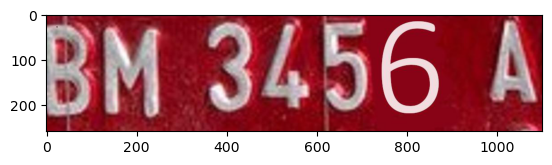

In [5]:
display(imgs[0])

In [6]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

Error: 1251.487595170285
Error: 1301.9554296167314
Error: 1317.9081333467093
Error: 1529.5004576038423
Error: 1557.5846361886634


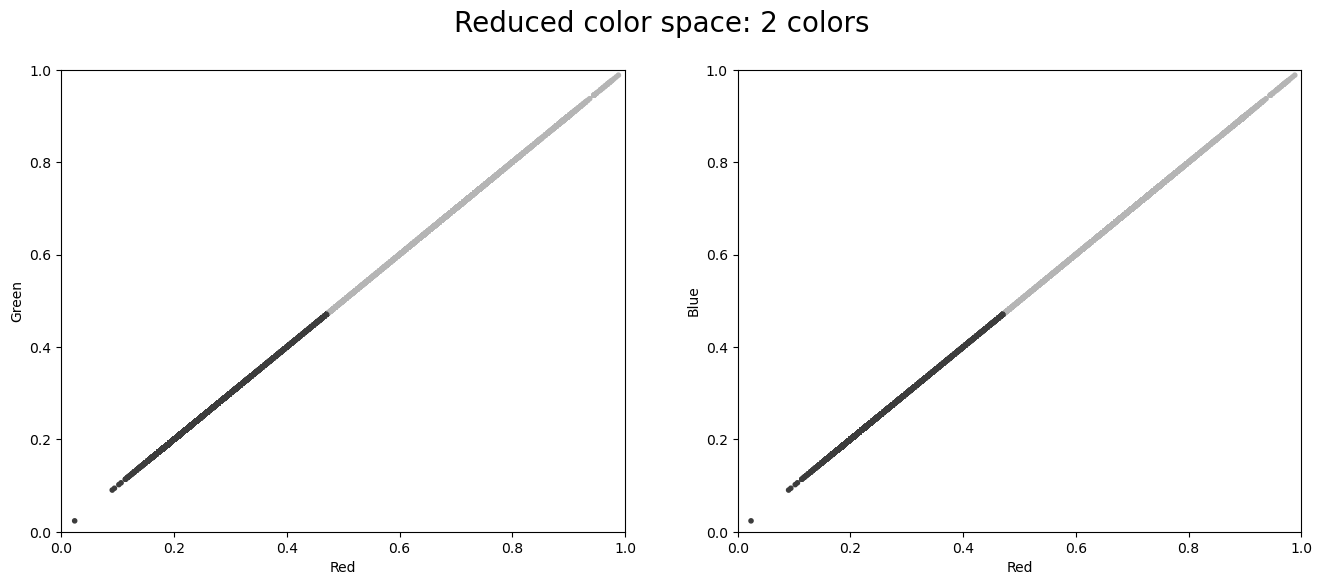

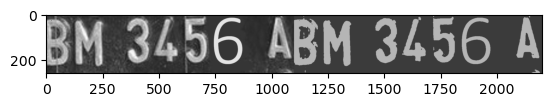

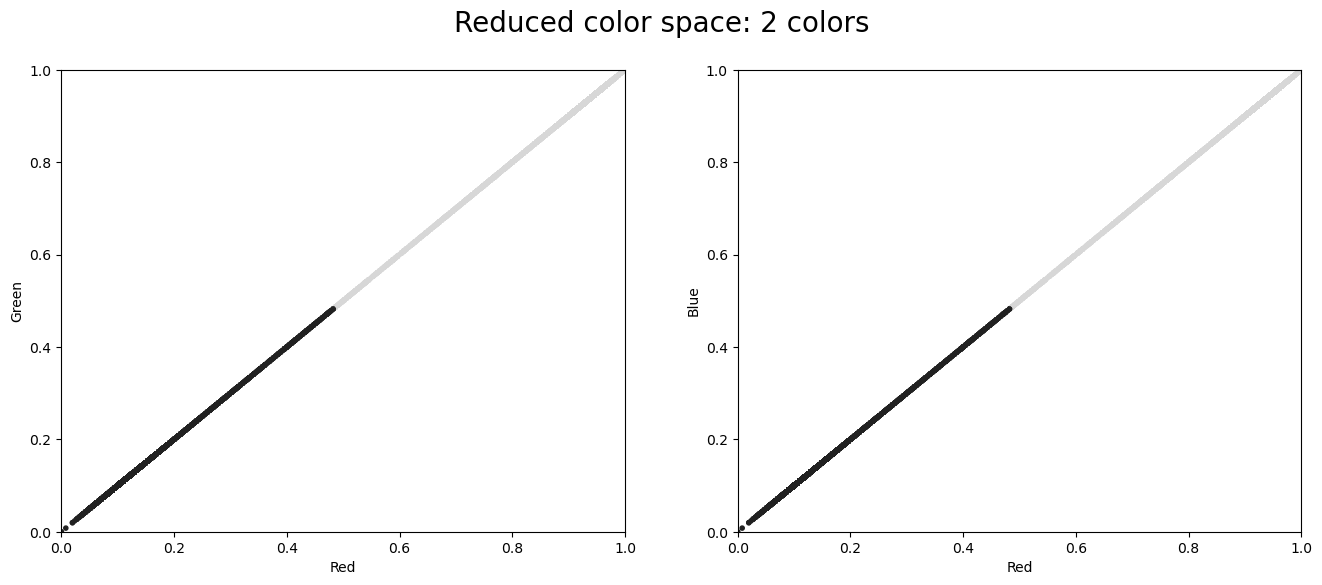

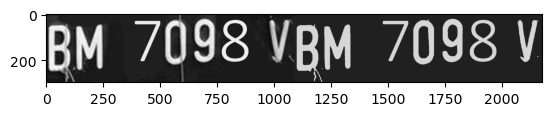

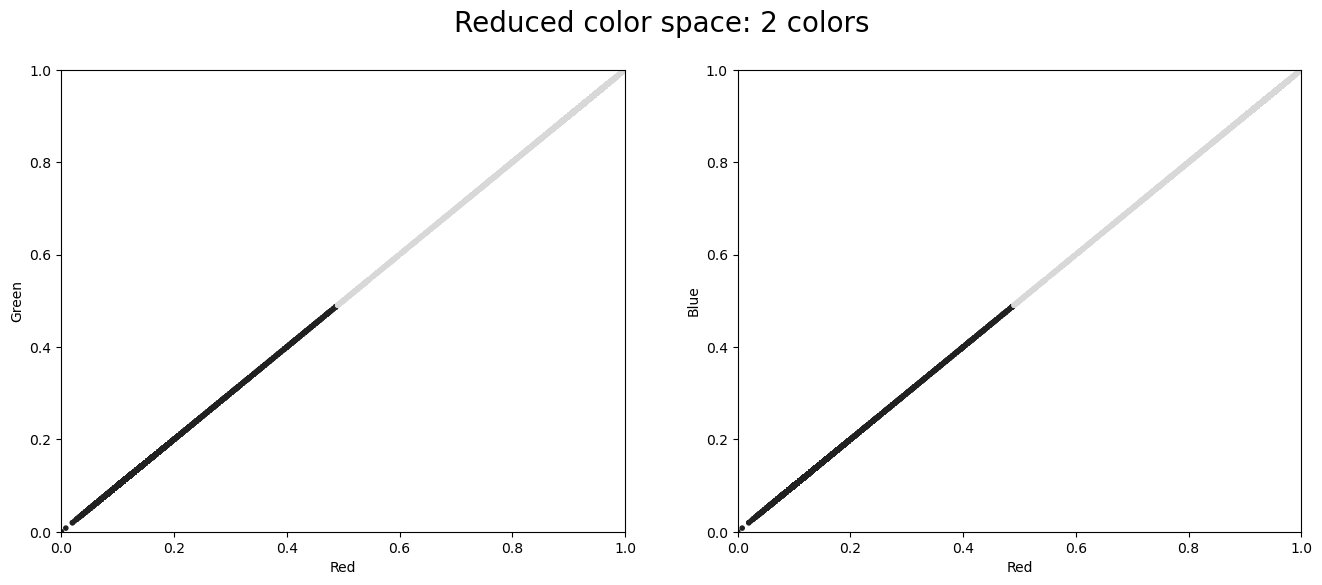

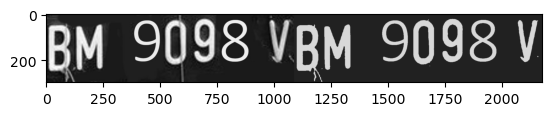

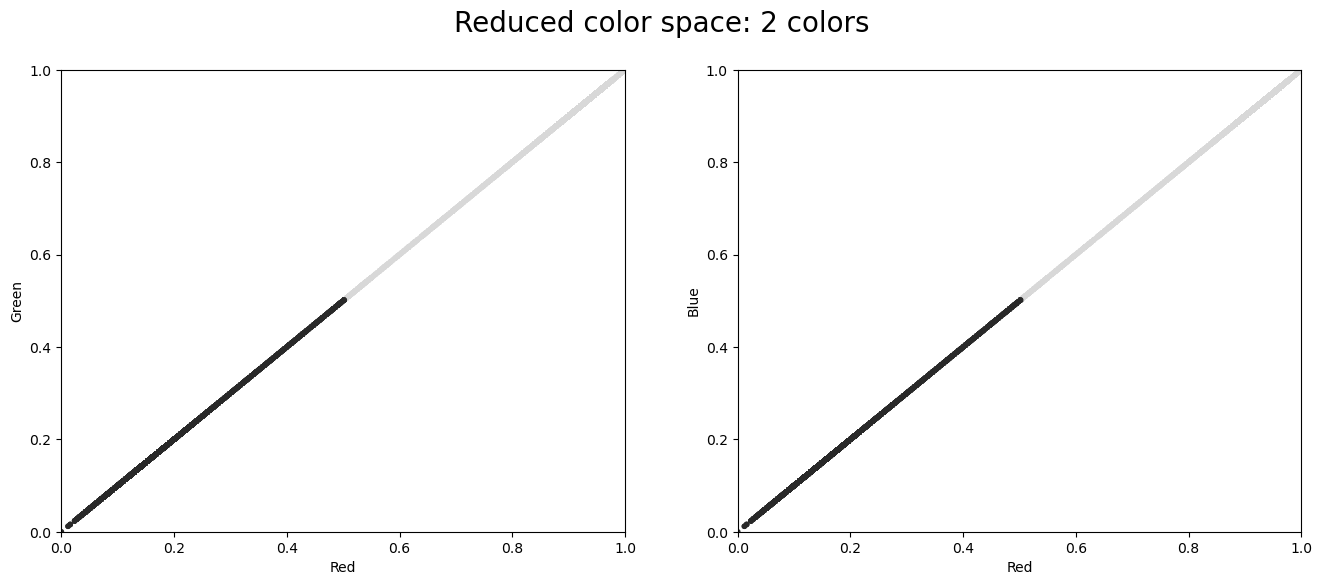

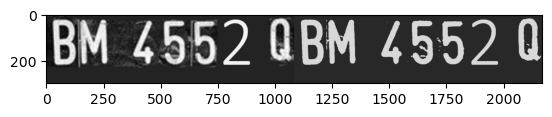

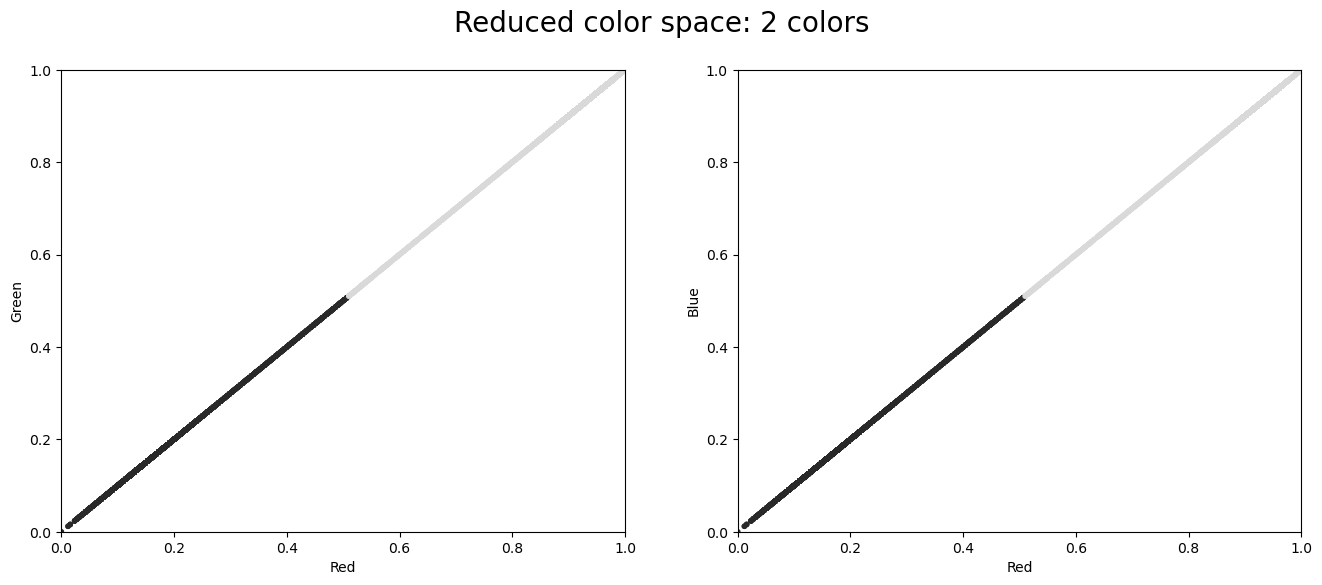

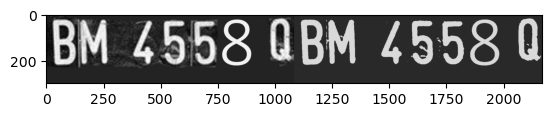

In [37]:
import warnings
warnings.filterwarnings("ignore")

for img_colored in imgs:
    # convert to grayscale keeping 3 channels
    img = np.zeros_like(img_colored)

    h, w, c = img_colored.shape
    img = np.average(img_colored, axis=2).reshape(h, w, 1).repeat(3, axis=2).astype(np.uint8)

    h, w, c = img.shape
    data = img.reshape(h * w, c) / 255

    kmeans = MiniBatchKMeans(2)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

    plot_pixels(data, colors=new_colors,title="Reduced color space: 2 colors") 
    new_img = new_colors.reshape(img.shape) * 255
    display(cv.hconcat((img, new_img.astype(np.uint8))))

    # calculate the error
    error = np.sum((img.astype("float") - new_img.astype("float")) ** 2)
    error /= float(img.shape[0] * img.shape[1])
    print(f"Error: {error}")
